In [19]:
# Imports
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path


# Load File
BASE_DIR = Path.cwd().parents[1]
DATA_DIR = BASE_DIR / "data"

file = DATA_DIR / "planner_template - chavez_pope.csv"

df = pd.read_csv(file).set_index("course_name")
df

,credits,day,start_time,duration,room,lecturer
course_name,,,,,,
63-501 - Atmospheric Dynamics,6,Tuesday,9:15,90,A,Nadjelka
63-503 - Radiation and Climate,6,Tuesday,12:15,90,B,Stephan
63-510 - Introduction to Atmospheric Physics,6,Wednesday,9:15,90,C,Juan
63-520 - Geophysical Wave Lab,6,Monday,11:15,90,D,Sergiey
63-580 - Advanced Practical Python Development,6,Monday,17:15,90,E,Aaron


In [16]:
df["duration"] = pd.to_timedelta(df["duration"], unit="minutes")
df["duration"]

course_name
63-501 - Atmospheric Dynamics                    0 days 01:30:00
63-503 - Radiation and Climate                   0 days 01:30:00
63-510 - Introduction to Atmospheric Physics     0 days 01:30:00
63-520 - Geophysical Wave Lab                    0 days 01:30:00
63-580 - Advanced Practical Python Development   0 days 01:30:00
Name: duration, dtype: timedelta64[ns]

In [17]:
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["end_time"] = df["start_time"] + df["duration"]

df


,credits,day,start_time,duration,room,lecturer,start_minutes,end_time
course_name,,,,,,,,
63-501 - Atmospheric Dynamics,6,Tuesday,1900-01-01 09:15:00,0 days 01:30:00,A,Nadjelka,555,1900-01-01 10:45:00
63-503 - Radiation and Climate,6,Tuesday,1900-01-01 12:15:00,0 days 01:30:00,B,Stephan,735,1900-01-01 13:45:00
63-510 - Introduction to Atmospheric Physics,6,Wednesday,1900-01-01 09:15:00,0 days 01:30:00,C,Juan,555,1900-01-01 10:45:00
63-520 - Geophysical Wave Lab,6,Monday,1900-01-01 11:15:00,0 days 01:30:00,D,Sergiey,675,1900-01-01 12:45:00
63-580 - Advanced Practical Python Development,6,Monday,1900-01-01 17:15:00,0 days 01:30:00,E,Aaron,1035,1900-01-01 18:45:00


In [14]:
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["start_minutes"] = df["start_time"].dt.hour * 60 + df["start_time"].dt.minute
df["start_minutes"]

course_name
63-501 - Atmospheric Dynamics                      555
63-503 - Radiation and Climate                     735
63-510 - Introduction to Atmospheric Physics       555
63-520 - Geophysical Wave Lab                      675
63-580 - Advanced Practical Python Development    1035
Name: start_minutes, dtype: int32

In [21]:
Rectangle(0,1,1)

TypeError: 'int' object is not subscriptable

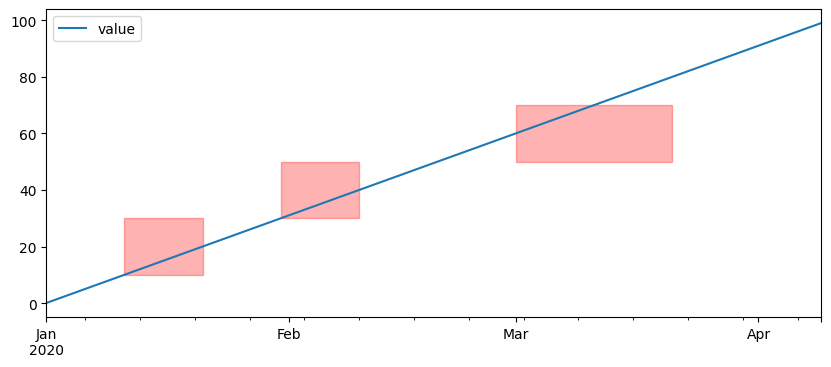

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Example data
dates = pd.date_range("2020-01-01", periods=100)
df = pd.DataFrame({"value": range(100)}, index=dates)

rect_df = pd.DataFrame({
    "x0": [dates[10], dates[30], dates[60]],
    "x1": [dates[20], dates[40], dates[80]],
    "y0": [10, 30, 50],
    "y1": [30, 50, 70]
})


ax = df.plot(figsize=(10, 4))

# Loop through each row and add a rectangle
for _, row in rect_df.iterrows():
    rect = Rectangle(
        (row.x0, row.y0),             # bottom-left corner
        row.x1 - row.x0,              # width (can be a Timedelta)
        row.y1 - row.y0,              # height
        alpha=0.3,
        color="red"
    )
    ax.add_patch(rect)

plt.show()


In [26]:
rect_df

,x0,x1,y0,y1
0,2020-01-11,2020-01-21,10,30
1,2020-01-31,2020-02-10,30,50
2,2020-03-01,2020-03-21,50,70


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle

# Weekday order
WEEK_DAYS = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_to_x = {day: i for i, day in enumerate(WEEK_DAYS)}

# Load CSV
df = pd.read_csv(file).set_index("course_name")

# Parse times
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["duration"]  = pd.to_timedelta(df["duration"], unit="minutes")
df["end_time"] = df["start_time"] + df["duration"]

user="cp"

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

for _, row in df.iterrows():
    x = day_to_x[row["day"]]
    y = row["start_time"]
    height = row["duration"]
    width = 0.9   # slot width

    rect = Rectangle((x - width/2, y), width, height,
                     facecolor="skyblue", edgecolor="black", alpha=0.7)
    ax.add_patch(rect)

    ax.text(x, y + height/2, row.name, ha="center", va="center", fontsize=8)

# X-axis = days
ax.set_xticks(np.arange(len(WEEK_DAYS)))
ax.set_xticklabels(WEEK_DAYS)
ax.set_xlim(-0.5, len(WEEK_DAYS) - 0.5)
ax.xaxis.tick_top()

# Y-axis = time
ax.invert_yaxis()
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.yaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.yaxis.set_minor_locator(mdates.MinuteLocator(interval=30))

ax.set_ylabel("Time")
ax.set_title(f"{user}'s Study Timetable")

plt.tight_layout()
plt.show()


C:\Users\cpope\AppData\Local\Temp\ipykernel_25124\465300082.py:51: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 864x11812257 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 1000x600 with 1 Axes>

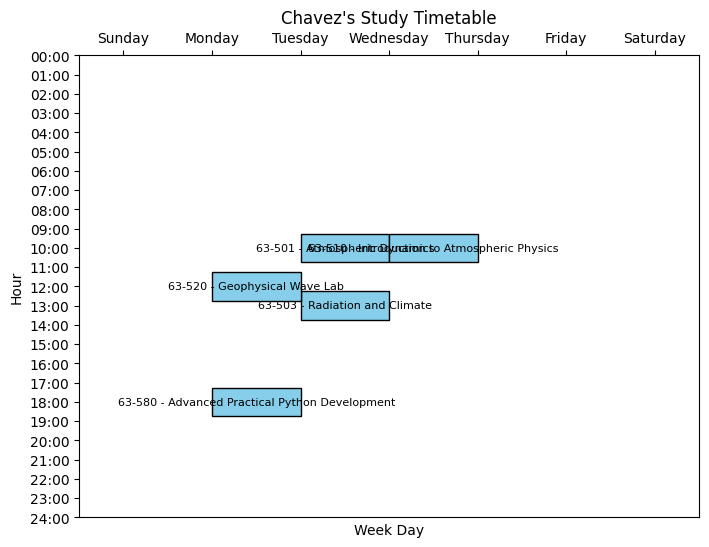

In [33]:
# Imports
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from soupsieve.css_match import DAYS_IN_WEEK

# Load File
# Load File
BASE_DIR = Path.cwd().parents[1]
DATA_DIR = BASE_DIR / "data"

file = DATA_DIR / "planner_template - chavez_pope.csv"

user = "Chavez"

df = pd.read_csv(file).set_index("course_name")

# Prepare the data
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["duration"] = pd.to_timedelta(df["duration"], unit="minutes")
df["end_time"] = df["start_time"] + df["duration"]

# Period to create timetable display
# period = Rectangle(
#     xy=(df["day"], df["start_time"]),
#     width=df["day"],
#     height=df["duration"]
# )


# Plot
fig, ax = plt.subplots(figsize=(8, 6))
for subject, row in df.iterrows():
    x = WEEK_DAYS.index(row["day"])  # Convert day string to x-position
    y = row["start_time"].hour * 60 + row["start_time"].minute  # Minutes since midnight
    width = 1  # One day wide
    height = row["duration"].total_seconds() / 60  # Duration in minutes

    period = Rectangle(
        xy=(x, y),
        width=width,
        height=height,
        facecolor="skyblue",
        edgecolor="black"
    )
    ax.add_patch(period)

    # Optional: label the box
    ax.text(x + 0.5, y + height / 2, subject, ha="center", va="center", fontsize=8)
ax.set_title(f"{user}'s Study Timetable")
ax.xaxis.tick_top()
ax.set_xticks(ticks=np.arange(0, len(WEEK_DAYS)), labels=WEEK_DAYS)
ax.set_xlim(- 0.5, len(WEEK_DAYS) - 0.5)
ax.set_xticklabels(WEEK_DAYS)
ax.set_xlabel("Week Day")
ax.invert_yaxis()
ax.set_yticks(np.arange(0, 24*60+1, 60))
ax.set_yticklabels([f"{h:02d}:00" for h in range(25)])
ax.set_ylabel("Hour")
# ax.set_yticks(HOURS)

plt.show()

# define times and days
# start = dt.datetime(2025,1,1, 8,0)
# datetime_vec = [start + i * dt.timedelta(minutes=15) for i in range(0,49)]  # quarter hour steps
# time = [t.time() for t in datetime_vec]
# print(time)
# days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# print(df)



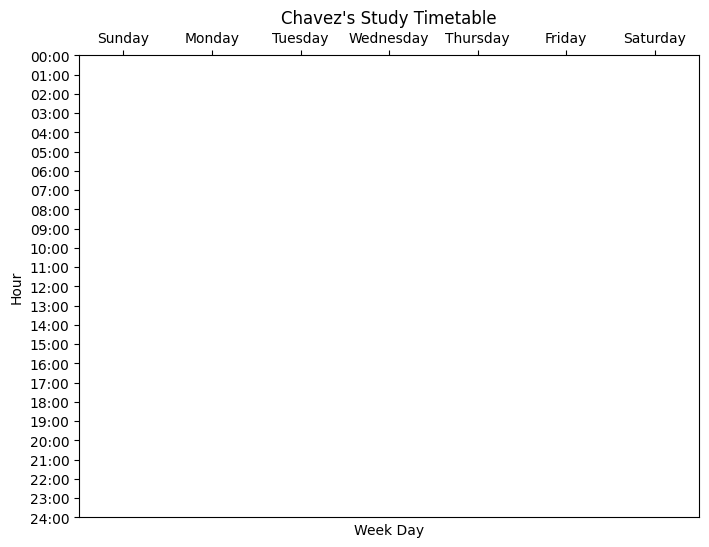

In [4]:
# Imports
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

from soupsieve.css_match import DAYS_IN_WEEK

# Load File
# Load File
BASE_DIR = Path.cwd().parents[1]
DATA_DIR = BASE_DIR / "data"

file = DATA_DIR / "planner_template - chavez_pope.csv"

user = "Chavez"

df = pd.read_csv(file).set_index("course_name")

# Prepare the data
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["duration"] = pd.to_timedelta(df["duration"], unit="minutes")
df["end_time"] = df["start_time"] + df["duration"]

# Convert to mdates float values
df["y"] = mdates.date2num(df["start_time"])
df["height"] = mdates.date2num(df["end_time"]) - df["y"]

# Map day names to x positions
day_to_x = {day: i for i, day in enumerate(WEEK_DAYS)}
df["x"] = df["day"].map(day_to_x)



# Plot
fig, ax = plt.subplots(figsize=(8, 6))
for _, row in df.iterrows():
    rect = Rectangle(
        (row["x"], row["y"]),
        width=1,
        height=row["height"],
        facecolor="skyblue",
        edgecolor="black"
    )
    ax.add_patch(rect)

ax.set_title(f"{user}'s Study Timetable")
ax.xaxis.tick_top()
ax.set_xticks(ticks=np.arange(0, len(WEEK_DAYS)), labels=WEEK_DAYS)
ax.set_xlim(- 0.5, len(WEEK_DAYS) - 0.5)
ax.set_xticklabels(WEEK_DAYS)
ax.set_xlabel("Week Day")
ax.invert_yaxis()
ax.set_yticks(np.arange(0, 24*60+1, 60))
ax.set_yticklabels([f"{h:02d}:00" for h in range(25)])
ax.set_ylabel("Hour")
# ax.set_yticks(HOURS)

plt.show()

# define times and days
# start = dt.datetime(2025,1,1, 8,0)
# datetime_vec = [start + i * dt.timedelta(minutes=15) for i in range(0,49)]  # quarter hour steps
# time = [t.time() for t in datetime_vec]
# print(time)
# days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# print(df)



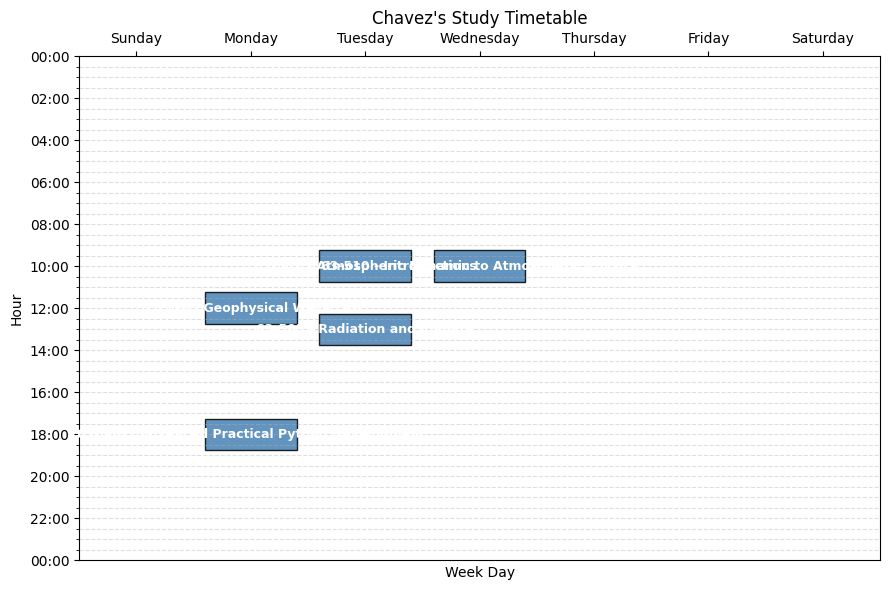

In [5]:
# ============================================================
# Study Timetable Plotter
# ============================================================

# Imports
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

# ============================================================
# Paths and constants
# ============================================================

BASE_DIR = Path.cwd().parents[1]
DATA_DIR = BASE_DIR / "data"

WEEK_DAYS = [
    "Sunday", "Monday", "Tuesday",
    "Wednesday", "Thursday", "Friday", "Saturday"
]

user = "Chavez"
file = DATA_DIR / "planner_template - chavez_pope.csv"

# ============================================================
# Load and prepare data
# ============================================================

df = pd.read_csv(file).set_index("course_name")

# Convert times
df["start_time"] = pd.to_datetime(df["start_time"], format="%H:%M")
df["duration"] = pd.to_timedelta(df["duration"], unit="minutes")
df["end_time"] = df["start_time"] + df["duration"]

# Map weekday names to x-axis positions
day_to_x = {day: i for i, day in enumerate(WEEK_DAYS)}
df["x"] = df["day"].map(day_to_x)

# Convert times to Matplotlib numeric date format
df["start_num"] = mdates.date2num(df["start_time"])
df["end_num"] = mdates.date2num(df["end_time"])
df["height"] = df["end_num"] - df["start_num"]

# ============================================================
# Plot
# ============================================================

fig, ax = plt.subplots(figsize=(9, 6))

for course, row in df.iterrows():

    rect = Rectangle(
        (row["x"] - 0.4, row["start_num"]),
        width=0.8,
        height=row["height"],
        facecolor="steelblue",
        edgecolor="black",
        alpha=0.85
    )

    ax.add_patch(rect)

    # Course label
    ax.text(
        row["x"],
        row["start_num"] + row["height"] / 2,
        course,
        ha="center",
        va="center",
        fontsize=9,
        color="white",
        weight="bold"
    )

# ------------------------------------------------------------
# Axis configuration
# ------------------------------------------------------------

ax.set_title("Chavez's Study Timetable")

# X axis: weekdays
ax.set_xlim(-0.5, 6.5)
ax.set_xticks(range(7))
ax.set_xticklabels([
    "Sunday", "Monday", "Tuesday",
    "Wednesday", "Thursday", "Friday", "Saturday"
])
ax.xaxis.tick_top()
ax.set_xlabel("Week Day")

# Y axis: time of day
ax.invert_yaxis()

# Force limits to one day to avoid autoscale issues
day_start = mdates.date2num(df["start_time"].min().normalize())
day_end   = day_start + 1

ax.set_ylim(day_end, day_start)

ax.yaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.yaxis.set_minor_locator(mdates.MinuteLocator(interval=30))
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_ylabel("Hour")

# Grid for readability
ax.grid(True, which="both", axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


In [4]:
print(df)

                                                credits        day  \
course_name                                                          
63-501 - Atmospheric Dynamics                         6    Tuesday   
63-503 - Radiation and Climate                        6    Tuesday   
63-510 - Introduction to Atmospheric Physics          6  Wednesday   
63-520 - Geophysical Wave Lab                         6     Monday   
63-580 - Advanced Practical Python Development        6     Monday   

                                                        start_time  \
course_name                                                          
63-501 - Atmospheric Dynamics                  1900-01-01 09:15:00   
63-503 - Radiation and Climate                 1900-01-01 12:15:00   
63-510 - Introduction to Atmospheric Physics   1900-01-01 09:15:00   
63-520 - Geophysical Wave Lab                  1900-01-01 11:15:00   
63-580 - Advanced Practical Python Development 1900-01-01 17:15:00   

                  